# Introducción a regresión lineal
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B' , 'LSTAT', 'MEDV']
df.head()


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1284516519.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

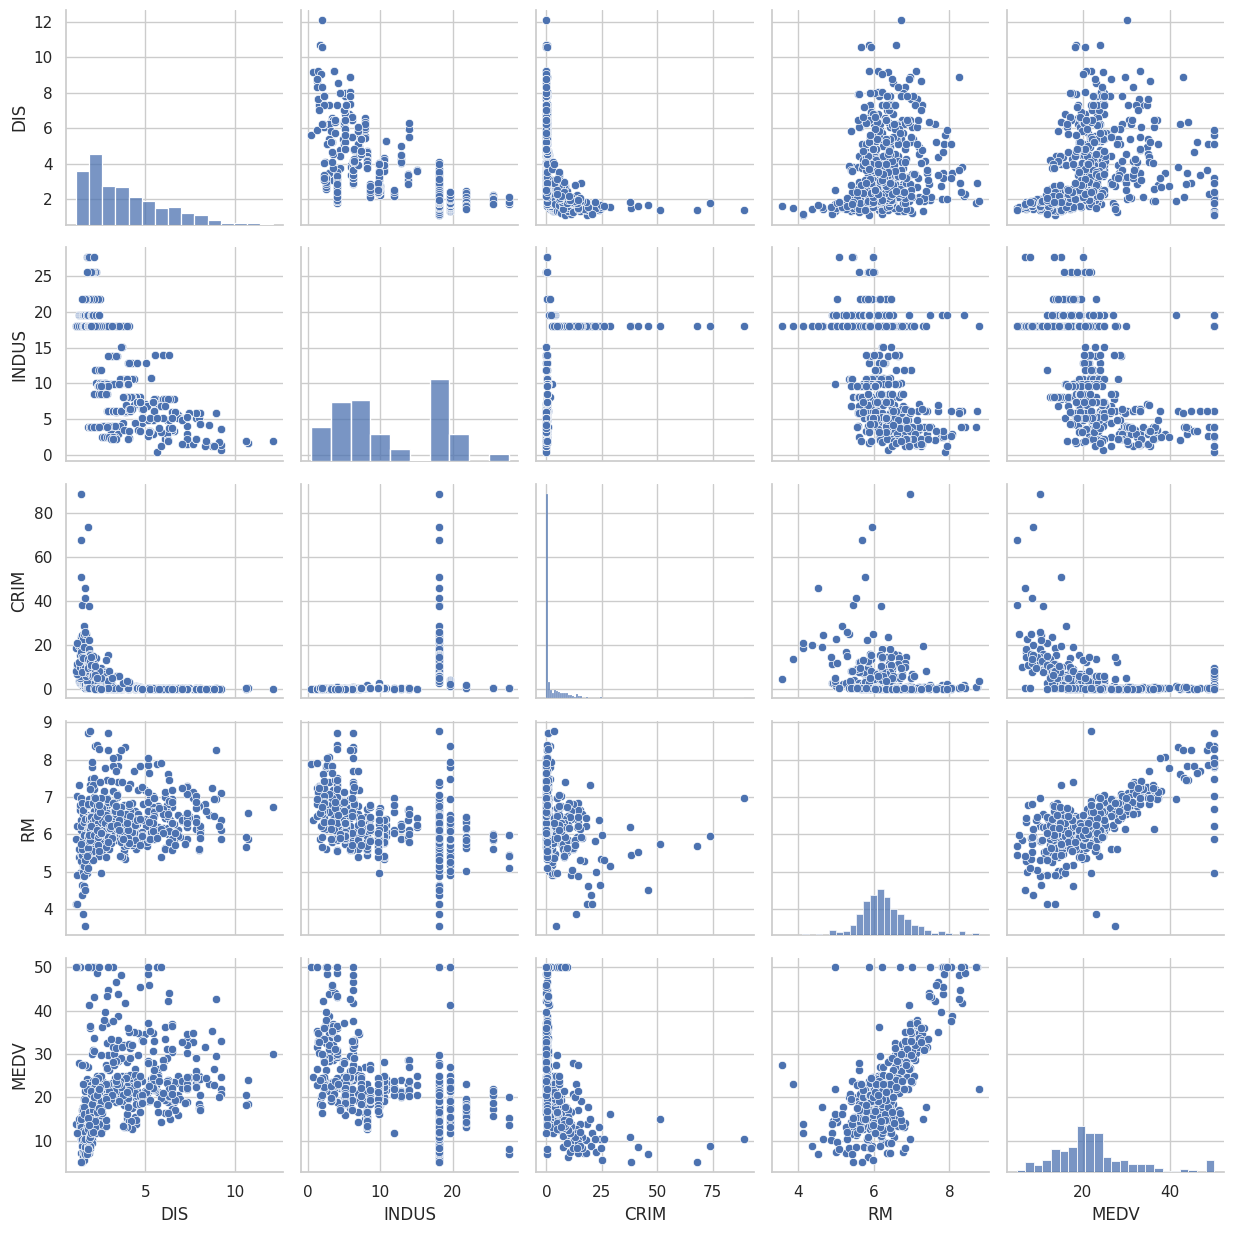

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')

# Escogeremos 5 principales

cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()


Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones.

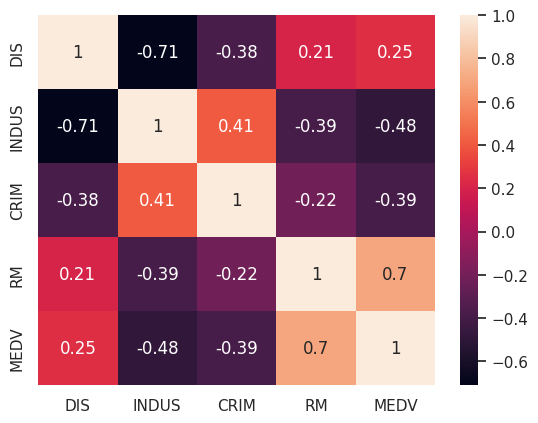

In [4]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)
plt.show()

## Creando modelo con scikit-learn

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x = df[['RM']].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)



LinearRegression()

## Análisis de resultados

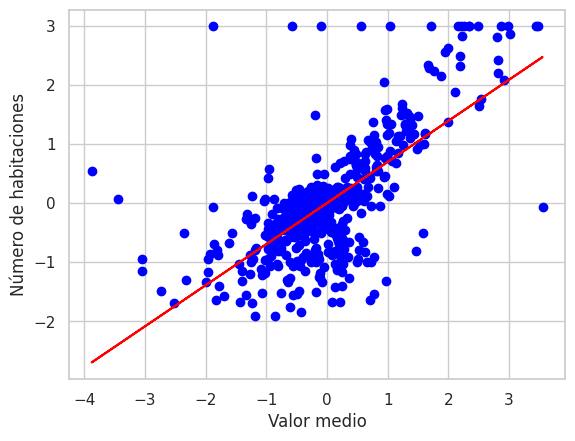

In [6]:
plt.scatter(x_std, y_std, color='blue')
plt.plot(x_std, slr.predict(x_std), color='red')
plt.ylabel('Número de habitaciones')
plt.xlabel('Valor medio')
plt.show()

## Generando predicción con el modelo

In [7]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))
print(
    "MEDV con 5 habitaciones de promedio: ",
    sc_y.inverse_transform(slr.predict(num_habitaciones_std))
)

MEDV con 5 habitaciones de promedio:  [[10.83992413]]
